<a href="https://colab.research.google.com/github/worldstar0722/IS_4482_25FA/blob/main/A6_Choi_Ellie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

In [ ]:
#A
import pandas as pd

url = "https://raw.githubusercontent.com/matthewpecsok/4482_fall_2024/main/data/NA_sales_filtered.csv"
df = pd.read_csv(url, encoding='latin-1')

#B
print("----- Data Info -----")
print(df.info())
print("\n----- Data Summary -----")
print(df.describe(include='all'))
print("\n----- First 5 Rows -----")
print(df.head())

#C
df = df.drop(columns=['Name'])

#D
print("\n----- Columns After Dropping 'Name' -----")
print(df.columns)


----- Data Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6345 non-null   object 
 1   Platform      6345 non-null   object 
 2   Genre         6345 non-null   object 
 3   Rating        6345 non-null   object 
 4   Critic_Score  6345 non-null   int64  
 5   Critic_Count  6345 non-null   int64  
 6   User_Score    6345 non-null   int64  
 7   User_Count    6345 non-null   int64  
 8   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 446.3+ KB
None

----- Data Summary -----
                 Name Platform   Genre Rating  Critic_Score  Critic_Count  \
count            6345     6345    6345   6345   6345.000000   6345.000000   
unique           4088       16      12      5           NaN           NaN   
top     Madden NFL 07      PS2  Action      T           NaN           NaN

# **Task 2**

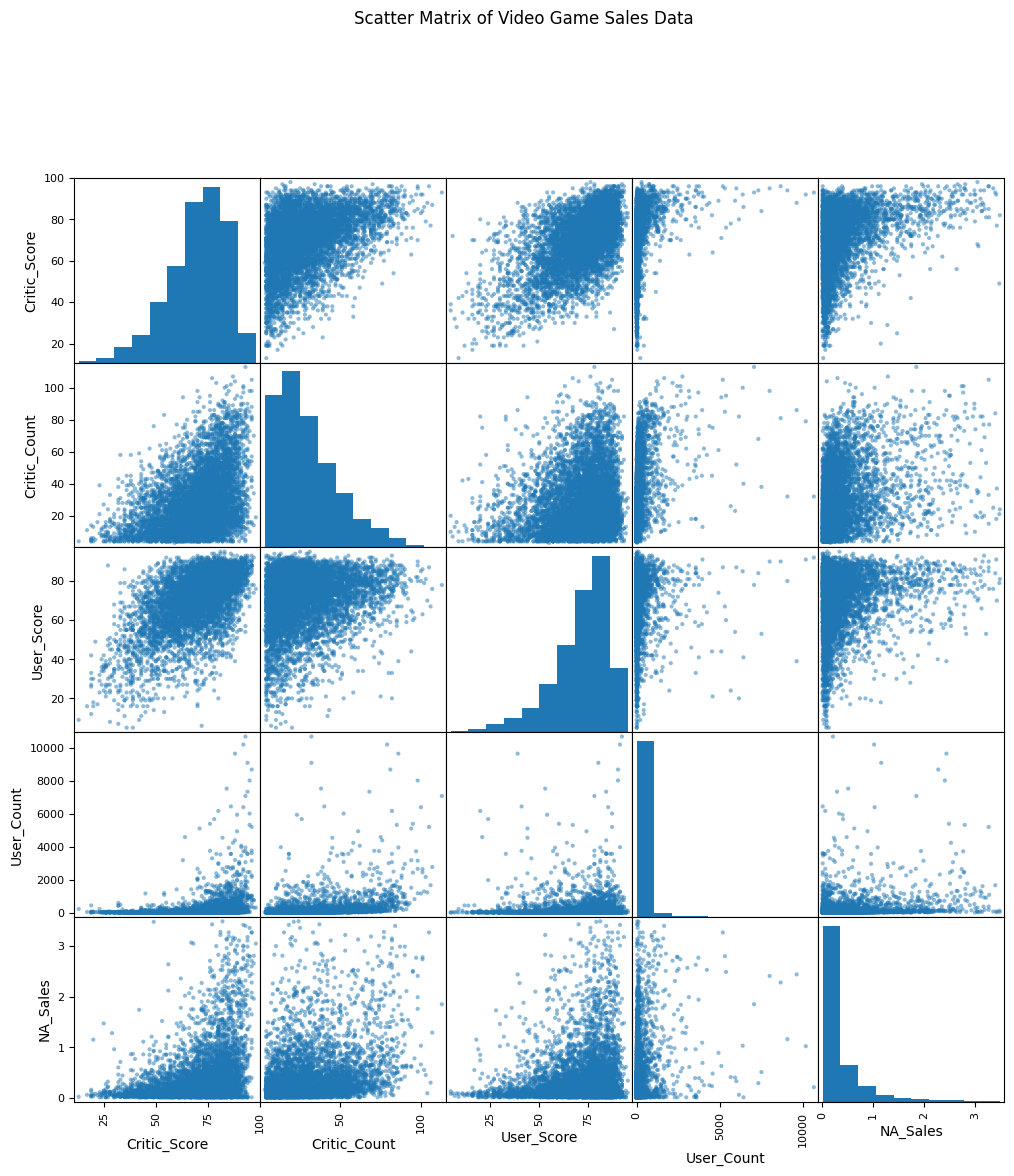

----- Correlation Matrix -----
              Critic_Score  Critic_Count  User_Score  User_Count  NA_Sales
Critic_Score      1.000000      0.390399    0.584548    0.243688  0.352974
Critic_Count      0.390399      1.000000    0.192762    0.348060  0.343505
User_Score        0.584548      0.192762    1.000000    0.012398  0.145351
User_Count        0.243688      0.348060    0.012398    1.000000  0.268393
NA_Sales          0.352974      0.343505    0.145351    0.268393  1.000000


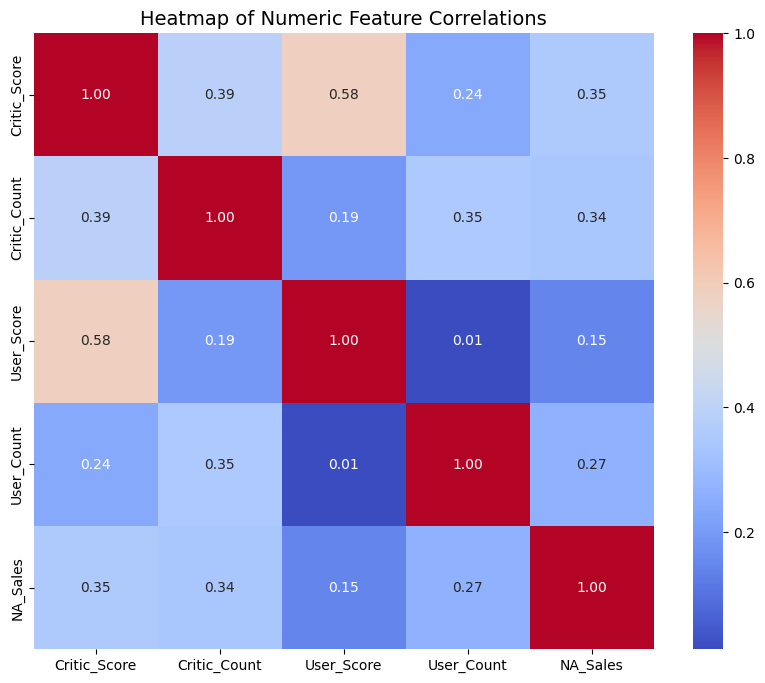

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#A
scatter_matrix(df, figsize=(12, 12), diagonal='hist')
plt.suptitle("Scatter Matrix of Video Game Sales Data", y=1.02)
plt.show()

#B
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sales_corr = numeric_df.corr()

print("----- Correlation Matrix -----")
print(sales_corr)

#C
plt.figure(figsize=(10, 8))
sns.heatmap(sales_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Numeric Feature Correlations", fontsize=14)
plt.show()


# Explanation
-The strongest positive correlation is between Critic_Score and User_Score (0.585). This makes sense because games that critics like often have higher user ratings too.</br>
-The strongest negative correlation: None of the correlations are negative — all values are positive.</br>
-The least correlation is between User_Score and User_Count (0.01), showing almost no relationship between how many users rate a game and the average user rating.

# **Task 3**

In [ ]:
from sklearn.utils import shuffle

#A
df = shuffle(df, random_state=42)  # fixing random_state for reproducibility

#B
X = df.drop(columns=['NA_Sales'])
y = df['NA_Sales']

X = pd.get_dummies(X, drop_first=True)

print("----- Feature DataFrame Shape -----")
print(X.shape)
print("----- Target Variable Shape -----")
print(y.shape)

#C
scoring_list = [
    'neg_mean_absolute_error',
    'neg_mean_absolute_percentage_error',
    'neg_mean_squared_error',
    'r2'
]
print("Scoring metrics:", scoring_list)


----- Feature DataFrame Shape -----
(6345, 34)
----- Target Variable Shape -----
(6345,)
Scoring metrics: ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'r2']


# **Task 4**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
import numpy as np

#A
lin_reg = LinearRegression()

lin_cv_results = cross_validate(
    lin_reg,
    X, y,
    cv=3,
    scoring=scoring_list,
    return_train_score=True
)

print("----- Linear Regression CV Results (mean across folds) -----")
for metric in scoring_list:
    print(metric, ":", np.mean(lin_cv_results['test_' + metric]))

#B
best_mape = float('inf')
best_leaf = None

for leaf in [1, 2, 5, 10, 20, 50, 100]:
    tree = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    tree_cv_results = cross_validate(
        tree,
        X, y,
        cv=3,
        scoring=scoring_list
    )
    mape = np.mean(tree_cv_results['test_neg_mean_absolute_percentage_error'])

    print(f"\nDecisionTreeRegressor(min_samples_leaf={leaf})")
    for metric in scoring_list:
        print(metric, ":", np.mean(tree_cv_results['test_' + metric]))

    if mape > best_mape:
        best_mape = mape
        best_leaf = leaf

print("\nBest Decision Tree setting: min_samples_leaf =", best_leaf)
print("Max (neg) MAPE achieved:", best_mape)



----- Linear Regression CV Results (mean across folds) -----
neg_mean_absolute_error : -0.2715927733118731
neg_mean_absolute_percentage_error : -2.5615000895433435
neg_mean_squared_error : -0.17921235270131033
r2 : 0.2661988507578617

DecisionTreeRegressor(min_samples_leaf=1)
neg_mean_absolute_error : -0.30960914105594955
neg_mean_absolute_percentage_error : -2.3020465684013174
neg_mean_squared_error : -0.29243985815602835
r2 : -0.19560225292604513

DecisionTreeRegressor(min_samples_leaf=2)
neg_mean_absolute_error : -0.2926582610979774
neg_mean_absolute_percentage_error : -2.233645156818038
neg_mean_squared_error : -0.2499914342001576
r2 : -0.022639893244475573

DecisionTreeRegressor(min_samples_leaf=5)
neg_mean_absolute_error : -0.268852499781105
neg_mean_absolute_percentage_error : -2.0338601207319305
neg_mean_squared_error : -0.20265287198049464
r2 : 0.16991717252196606

DecisionTreeRegressor(min_samples_leaf=10)
neg_mean_absolute_error : -0.2561366880874401
neg_mean_absolute_percen

# Explanation
-Linear Regression had a MAPE of about 2.56 → predictions were on average 256% off actual sales.</br>
-The best Decision Tree (min_samples_leaf=5) improved this to about 2.03 → about 203% error.</br>
-These errors are very high, meaning the models are not very reliable for predicting sales.</br>
-As in the instruction, *MAPE = 2.0 does not mean 2% error, it means 200% error.* So our models are, on average, predicting sales values more than twice as far from the true values.

# **Task 5**

In [ ]:
#A
X_fe = X.copy()

if 'User_Count' in df.columns:
    X_fe['User_Count_Squared'] = df['User_Count'] ** 2
else:
    print("Check your columns: User_Count not found in df.columns")

if 'User_Count' in df.columns:
    X_fe['User_Count_Cubed'] = df['User_Count'] ** 3
else:
    print("Check your columns: User_Count not found in df.columns")

print("----- Columns in Feature-Engineered X -----")
print(X_fe.columns)

lin_reg_fe = LinearRegression()

lin_cv_results_fe = cross_validate(
    lin_reg_fe,
    X_fe, y,
    cv=3,
    scoring=scoring_list
)

print("\n----- Linear Regression with Quadratic User_Count CV Results (mean) -----")
for metric in scoring_list:
    print(metric, ":", np.mean(lin_cv_results_fe['test_' + metric]))


----- Columns in Feature-Engineered X -----
Index(['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
       'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC',
       'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4',
       'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU',
       'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Adventure',
       'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_E10+',
       'Rating_M', 'Rating_T', 'Rating_missing', 'User_Count_Squared',
       'User_Count_Cubed'],
      dtype='object')

----- Linear Regression with Quadratic User_Count CV Results (mean) -----
neg_mean_absolute_error : -0.26255852692724874
neg_mean_absolute_percentage_error : -2.65015496523959
neg_mean_squared_error : -0.16801947055147307
r2 : 0.3113248825748919


# **Task 6**

In [ ]:
X_fe2 = X.copy()

X_fe2['User_Count_Squared'] = df['User_Count'] ** 2

import numpy as np
X_fe2['User_Count_Log1p'] = np.log1p(df['User_Count'])

print("X_fe2 shape:", X_fe2.shape)
print("New columns added:", [col for col in X_fe2.columns if 'User_Count' in col])


X_fe2 shape: (6345, 36)
New columns added: ['User_Count', 'User_Count_Squared', 'User_Count_Log1p']


In [ ]:
lin_summary, _ = run_cv_and_report(LinearRegression(), X_fe2, y, cv=3, scoring=scoring_list)
print("\nLinear Regression (with squared & log User_Count):")
for k, v in lin_summary.items():
    if k == 'neg_mean_absolute_percentage_error':
        print("MAPE:", v, "(", v*100, "% )")
    else:
        print(f"{k}: {v}")

tree_summary, _ = run_cv_and_report(
    DecisionTreeRegressor(min_samples_leaf=5, random_state=42),
    X_fe2, y, cv=3, scoring=scoring_list
)
print("\nDecision Tree (with squared & log User_Count):")
for k, v in tree_summary.items():
    if k == 'neg_mean_absolute_percentage_error':
        print("MAPE:", v, "(", v*100, "% )")
    else:
        print(f"{k}: {v}")



Linear Regression (with squared & log User_Count):
neg_mean_absolute_error: -0.2546446434539639
MAPE: -2.5445168659742374 ( -254.45168659742373 % )
neg_mean_squared_error: -0.15701470766713857
r2: 0.3564548172392851

Decision Tree (with squared & log User_Count):
neg_mean_absolute_error: -0.268615362677774
MAPE: -2.027063201491243 ( -202.70632014912428 % )
neg_mean_squared_error: -0.20242210922069204
r2: 0.1708502838928951


# Explanation
- For Linear Regression, the MAPE is 254%, slightly worse than the baseline (~256%). R² improved to 0.357 from ~0.266.</br>
- For the Decision Tree, MAPE is 207%, a small improvement compared to the baseline (~203%), but R² dropped to 0.179.</br>
- Conclusion: Feature engineering helped Linear Regression explain more variance (higher R²), but error levels (MAPE) remain very high for both models. Predictions are still off by 2× or more on average, showing the models capture some patterns but overall performance is limited.